In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv',header = None, delimiter = r"\s+", names = columns)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(df.shape)

(506, 14)


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:

#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

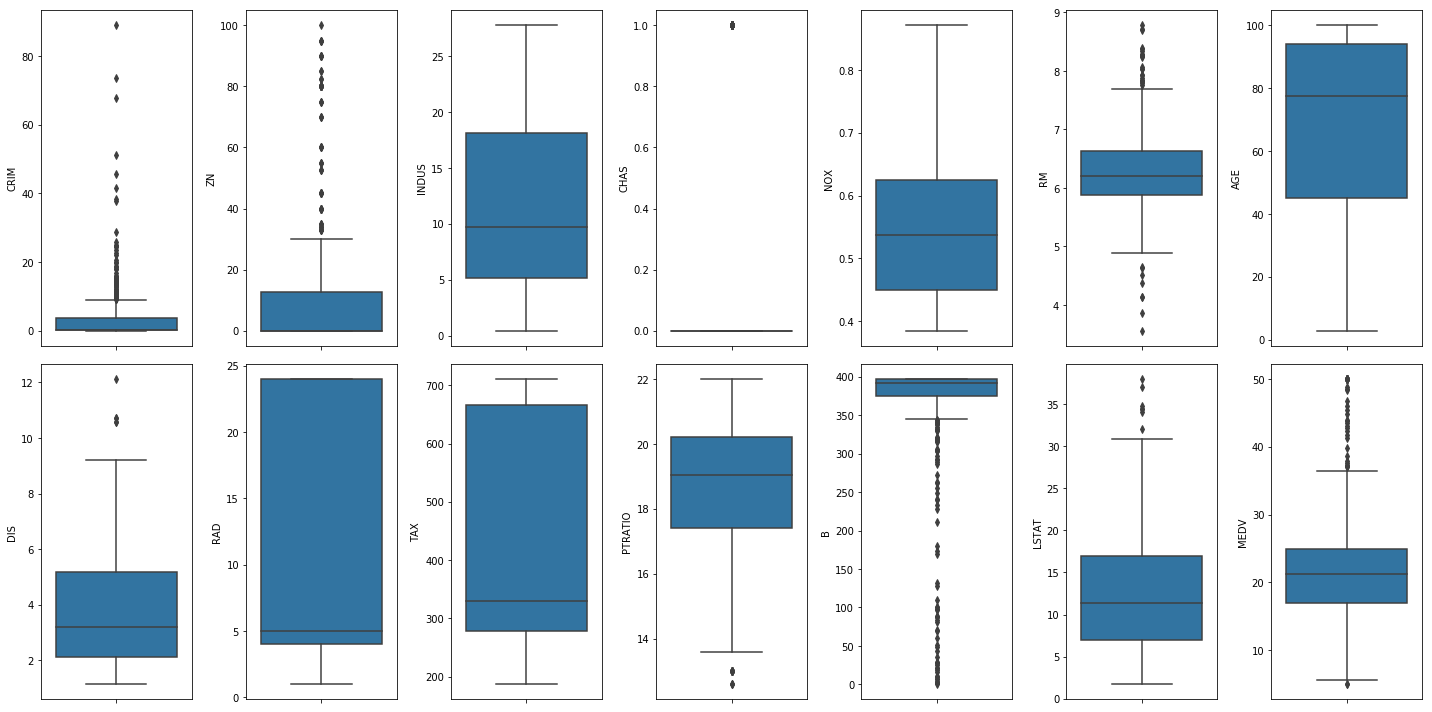

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in df.items():
    sns.boxplot(y=i, data=df, ax=axs[index])
    index += 1
plt.tight_layout()

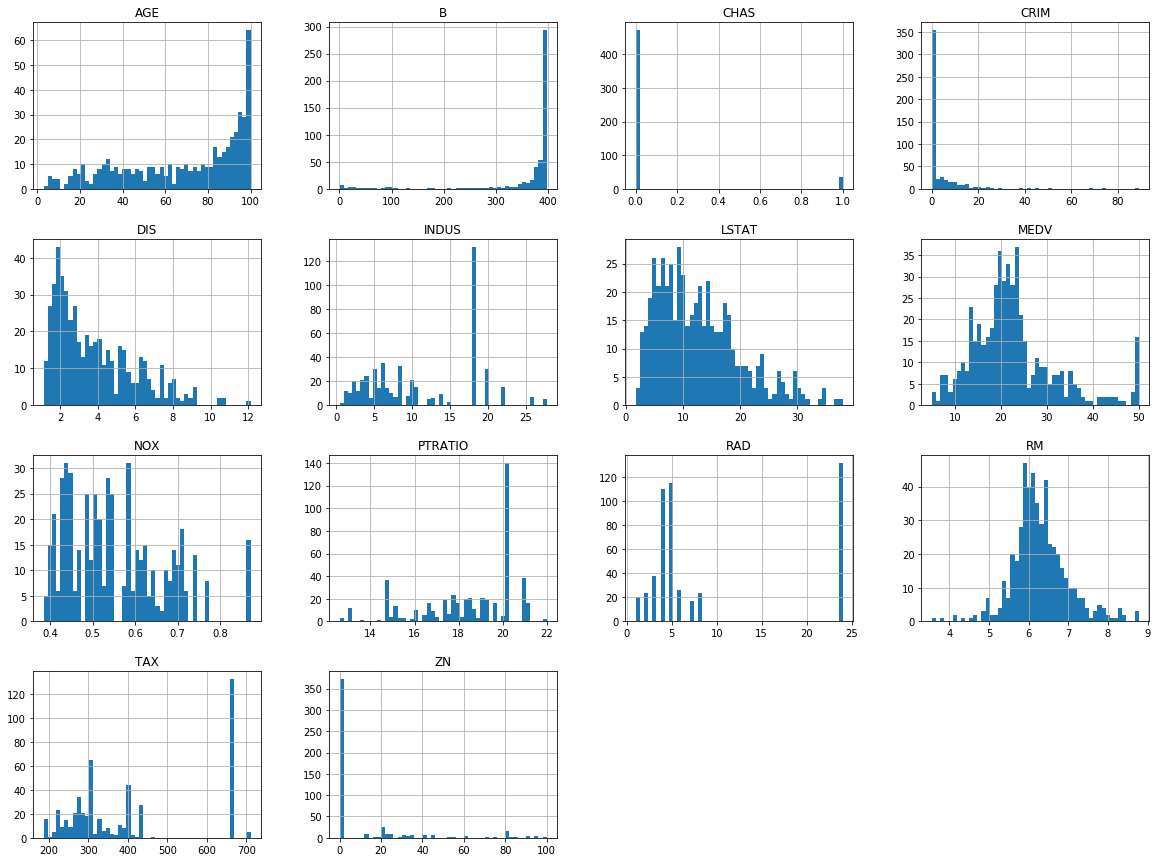

In [9]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [10]:
###MEDV stops at 50, take out outliers

df = df[~(df['MEDV'] >= 50.0)]

In [11]:
df.shape

(506, 14)

In [12]:
###Correlation Heat Map

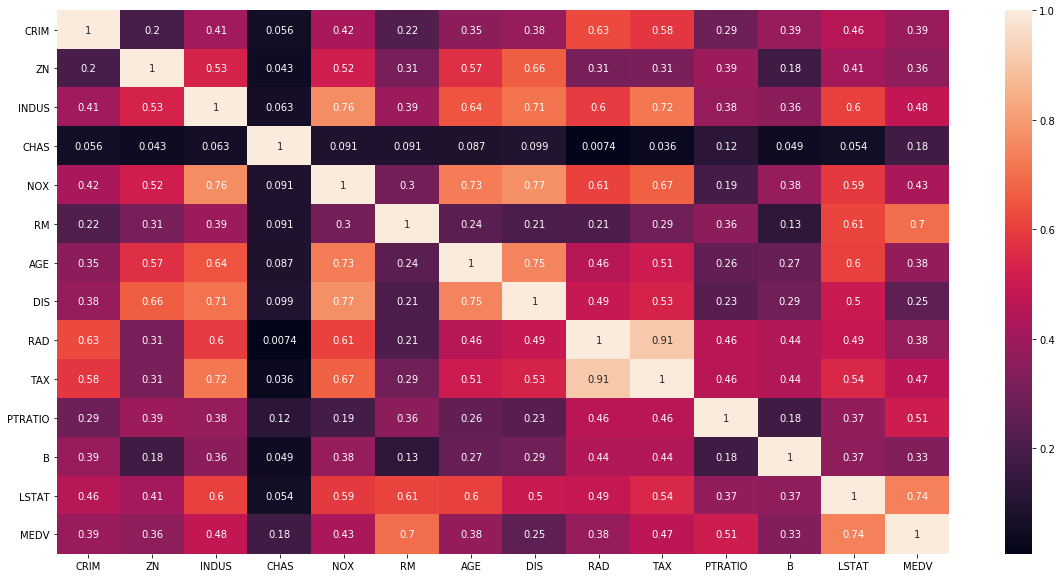

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr().abs(), annot = True)

In [14]:
### RM & LSTAT most highly correlated

In [15]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
attributes = ['MEDV','RM','ZN','LSTAT','INDUS']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016108EAC358>,
      dtype=object)

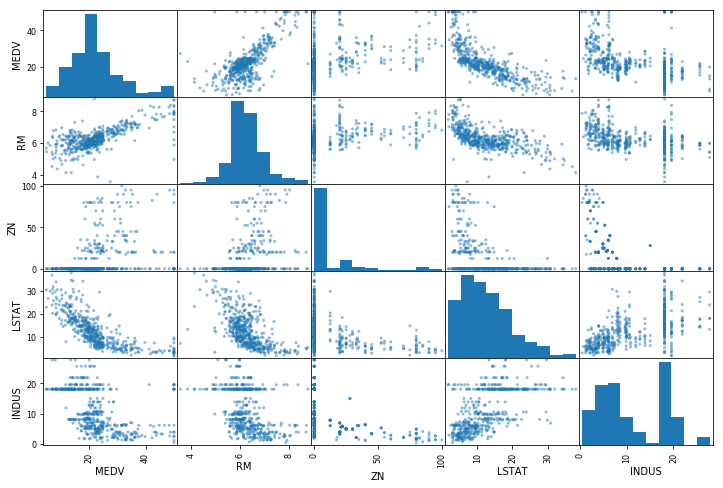

In [18]:
scatter_matrix(df[attributes], figsize = (12,8))

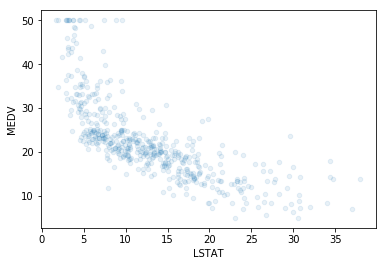

In [19]:
df.plot(kind = 'scatter', x='LSTAT',y = 'MEDV', alpha = 0.1)

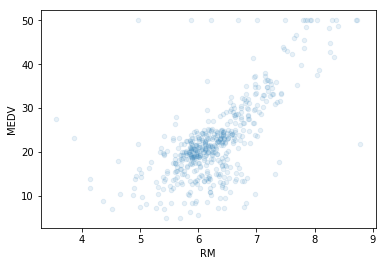

In [20]:
df.plot(kind = 'scatter', x='RM',y = 'MEDV', alpha = 0.1)

In [21]:
from sklearn import preprocessing
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression

In [22]:
## Preprocess data and scale to prepare for ML

In [23]:
x = df.iloc[:,0:13]
y = df['MEDV']

#### Regression

In [24]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [25]:
lm = LinearRegression()

In [26]:
model = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)
pd.DataFrame({'Actual':y_test, 'Predict':pred_y}).head()

,Actual,Predict
226,37.6,37.467236
292,27.9,31.391547
90,22.6,27.120196
373,13.8,6.468433
273,35.2,33.629667


In [27]:
linscore = model.score(x_train,y_train)
print(linscore)

0.7551332741779998


In [28]:
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

28.530458765974675


### Decision Tree

In [29]:
treemodel = DecisionTreeRegressor(max_depth = 5)

In [30]:
treemodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
pred_y = treemodel.predict(x_test)

In [33]:
pd.DataFrame({'Actual':y_test,'Predict':pred_y}).head()

,Actual,Predict
226,37.6,46.109091
292,27.9,30.636842
90,22.6,21.073077
373,13.8,13.800000
273,35.2,46.109091


In [34]:
score = treemodel.score(x_train,y_train)
print(score)

0.9190853081838286


In [35]:
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

29.779655701700104


Text(0, 0.5, 'Predicted Y')

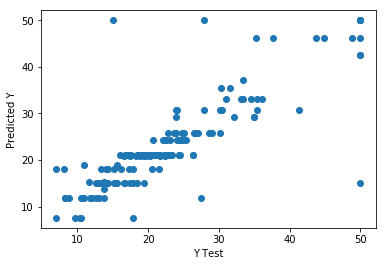

In [39]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')